In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [3]:
train = pd.read_csv('titanic_train.csv')


In [4]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


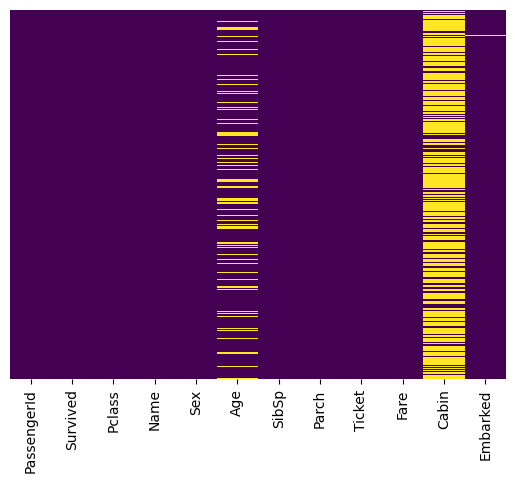

In [7]:
sns.heatmap(train.isnull(),yticklabels=False ,cbar=False,cmap='viridis')
plt.show()

In [8]:
sns.set_style('whitegrid')

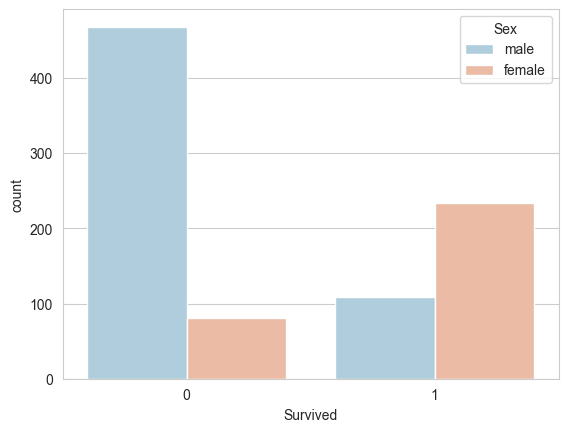

In [9]:
sns.countplot(x='Survived',hue='Sex',data= train,palette='RdBu_r')
plt.show()

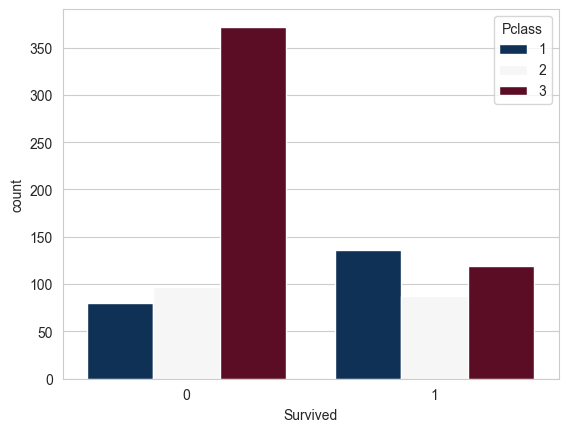

In [10]:
sns.countplot(x='Survived',hue='Pclass',data= train,palette='RdBu_r')
plt.show()

C:\Users\boche\AppData\Local\Temp\ipykernel_31024\1989697927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


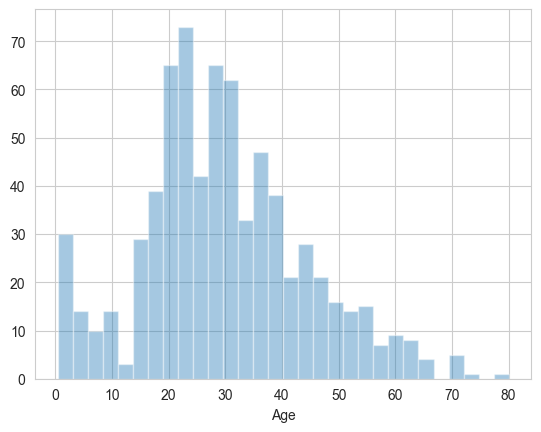

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
plt.show()

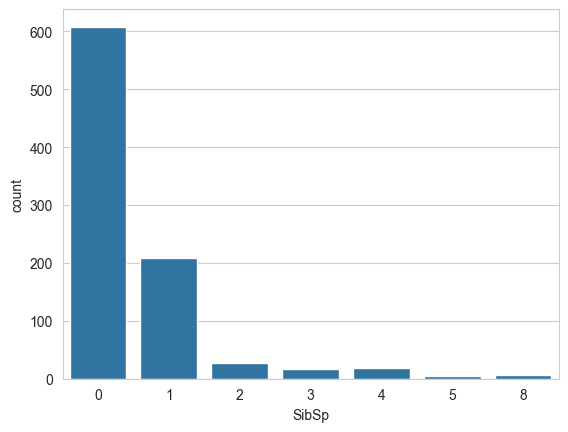

In [12]:
sns.countplot(x='SibSp',data=train)
plt.show()

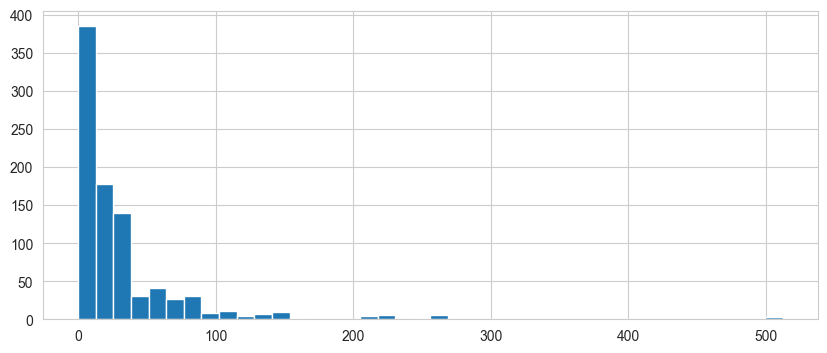

In [13]:
train['Fare'].hist(bins=40,figsize=(10,4))
plt.show()

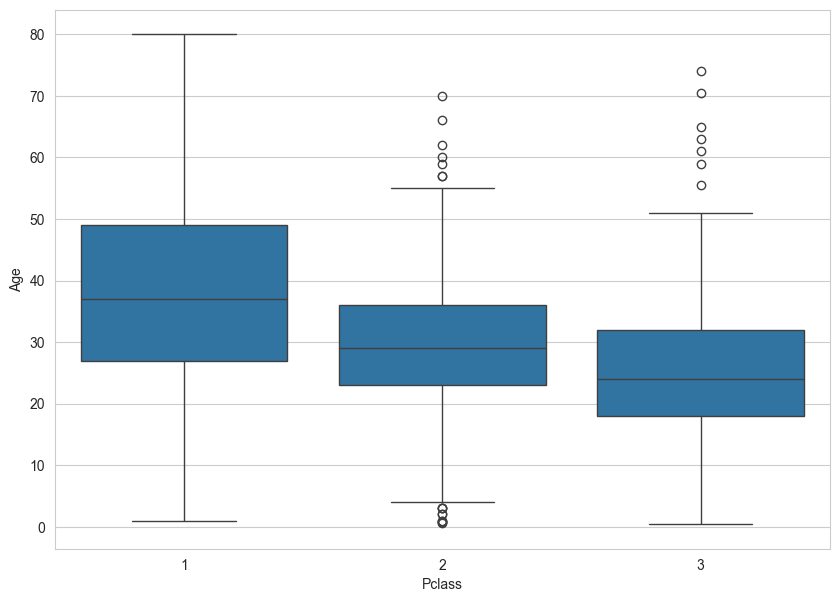

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

In [37]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [41]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\boche\AppData\Local\Temp\ipykernel_31024\3332558093.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\boche\AppData\Local\Temp\ipykernel_31024\3332558093.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


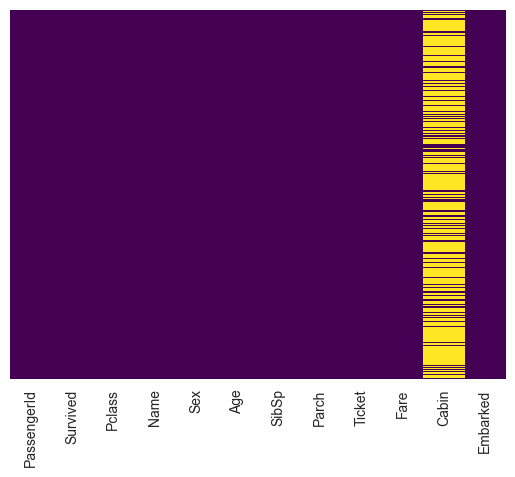

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

## we replaced nulls with avg values 

In [55]:
train.drop('Cabin',axis=1,inplace=True)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


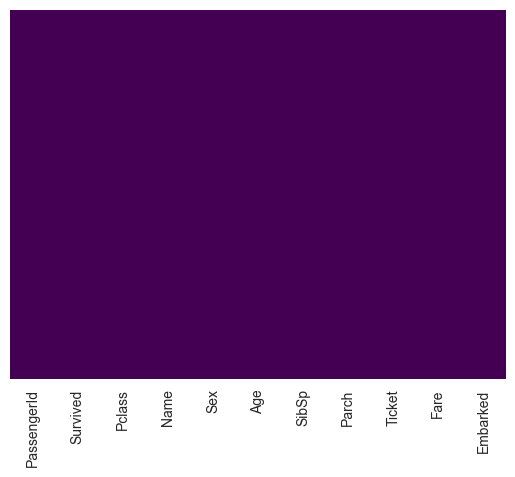

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()



In [63]:
sex = pd.get_dummies(train['Sex'])

In [67]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [69]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [71]:
train=pd.concat([train,sex,embark],axis=1)

In [73]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,False,False,False


In [77]:
train.drop(['Embarked','Sex','Name','Ticket'],axis=1,inplace=True)

In [79]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
886,887,0,2,27.0,0,0,13.00,False,True,False,True
887,888,1,1,19.0,0,0,30.00,True,False,False,True
888,889,0,3,24.0,1,2,23.45,True,False,False,True
889,890,1,1,26.0,0,0,30.00,False,True,False,False
890,891,0,3,32.0,0,0,7.75,False,True,True,False


In [89]:
train.drop('PassengerId',axis=1,inplace=True)

In [91]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,0,3,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,True


In [100]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [105]:
from sklearn.model_selection import train_test_split


In [109]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [111]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression

In [117]:
logmodel = LogisticRegression()

In [121]:
logmodel.fit(X_train,y_train)

C:\Users\boche\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
predictions=logmodel.predict(X_test)

In [125]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [131]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test,predictions)

array([[137,  20],
       [ 30,  81]], dtype=int64)